In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Import Libraries

In [2]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tqdm import tqdm
import shutil
# import tensorflow_datasets as tfds

In [3]:
#https://www.pythoncentral.io/how-to-recursively-copy-a-directory-folder-in-python/

def copyDirectory(src, dest):
    try:
        shutil.copytree(src, dest)
    # Directories are the same
    except shutil.Error as e:
        print('Directory not copied. Error: %s' % e)
    # Any error saying that the directory doesn't exist
    except OSError as e:
        print('Directory not copied. Error: %s' % e)

In [4]:
root = '../input/rock-classification/Dataset'
for class_name in os.listdir(root):
    for rock_name in os.listdir(os.path.join(root, class_name)):
        folder_path = os.path.join(os.path.join(root, class_name), rock_name)
        copyDirectory(folder_path, f"Dataset/{folder_path.split('/')[-1]}")

# Delete Corrupted Image Files

In [5]:
def del_corrupted_images(path):
    del_count = 0
    for folder in os.listdir(path):
        folder_path = os.path.join(path, folder)
        for filename in tqdm(os.listdir(folder_path)):
            filepath = os.path.join(folder_path, filename)
            try:
                fileobject = open(filepath, 'rb')
                is_ok = tf.compat.as_bytes('JFIF') in fileobject.peek(10)
            finally:
                fileobject.close()
            if not is_ok:
                del_count += 1
                os.remove(filepath)
    print("\n\nDeleted %d images" % del_count)

del_corrupted_images('./Dataset')

100%|██████████| 338/338 [00:00<00:00, 13140.12it/s]



Deleted 143 images


In [6]:
# data_dir = '/kaggle/input/rock-classification/Dataset/Igneous'
data_dir = './Dataset'
import pathlib
data_dir = pathlib.Path(data_dir)

In [90]:
# directory = 'Cleaned_Dataset'
# parent_dir = '/kaggle/temp'
# path = os.path.join(parent_dir, directory)
# os.makedirs(path)

In [ ]:
# import shutil
# keep_these = list()
# for root, dirs, files in os.walk('/kaggle/input'):
#     print(root)
#     print(dirs)
#     print(files)
# #     keep_these.append([ os.path.join(dirs, fi) for fi in files if fi.endswith(".jpg")])
# print(keep_these)
# # for files in delete_these:
# #     for item in files:
# #         shutil.copyfile(item, '/kaggle/temp')

In [98]:
# delete_these = list()
# for root, dirs, files in os.walk('/kaggle/input'):
#     delete_these.append([ os.path.join(root, fi) for fi in files if not fi.endswith(".jpg")])
# print(delete_these)
        

[[], [], [], [], ['/kaggle/input/rock-classification/Dataset/Metamorphic/Quartzite/quartzite-crystal-mineral-sample-studio-shot-with-black-background-972333846-5c7e6525c9e77c0001d19dda.webp'], ['/kaggle/input/rock-classification/Dataset/Metamorphic/Marble/images.jfif', '/kaggle/input/rock-classification/Dataset/Metamorphic/Marble/Marmo_z17.jfif', '/kaggle/input/rock-classification/Dataset/Metamorphic/Marble/u3tqorgn31mp65iypkwy_7e2e86ad-6a3f-410e-9584-caa5b075ccd7_825x700.webp', '/kaggle/input/rock-classification/Dataset/Metamorphic/Marble/mineral-stone-marble-nonfoliated-metamorphic-260nw-349915676.webp'], [], ['/kaggle/input/rock-classification/Dataset/Sedimentary/Limestone/104.jfif', '/kaggle/input/rock-classification/Dataset/Sedimentary/Limestone/238.jpeg', '/kaggle/input/rock-classification/Dataset/Sedimentary/Limestone/261.png', '/kaggle/input/rock-classification/Dataset/Sedimentary/Limestone/3.webp', '/kaggle/input/rock-classification/Dataset/Sedimentary/Limestone/7.jpeg', '/kag

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

1905


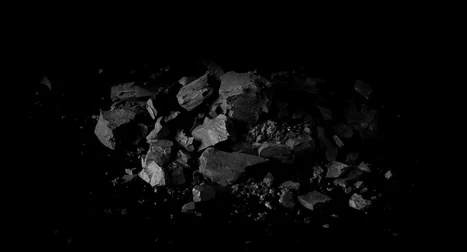

In [8]:
granite = list(data_dir.glob('Granite/*'))
coal = list(data_dir.glob('Coal/*'))

PIL.Image.open(str(coal[0]))

In [9]:
batch_size = 5
img_height = 180
img_width = 180

In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1934 files belonging to 7 classes.
Using 1548 files for training.


2022-10-05 00:41:55.789627: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [11]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1934 files belonging to 7 classes.
Using 386 files for validation.


In [12]:
class_names = train_ds.class_names
print(class_names)

['Basalt', 'Coal', 'Granite', 'Limestone', 'Marble', 'Quartzite', 'Sandstone']


2022-10-05 00:42:05.223947: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-10-05 00:42:05.733904: W tensorflow/core/framework/op_kernel.cc:1692] OP_REQUIRES failed at strided_slice_op.cc:108 : Invalid argument: slice index 5 of dimension 0 out of bounds.


InvalidArgumentError: slice index 5 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

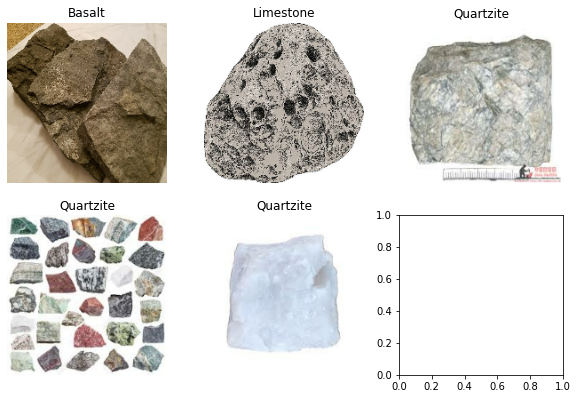

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [14]:
import matplotlib.pyplot as plt

# plt.imshow(images[1])
for images, labels in train_ds.take(1):
    print(labels)


# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")

tf.Tensor([3 4 3 5 6], shape=(5,), dtype=int32)


In [15]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(5, 180, 180, 3)
(5,)


In [16]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [17]:
normalization_layer = layers.Rescaling(1./255)

In [18]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


2022-10-05 00:42:30.345284: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [19]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [31]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
310/310 [==============================] - 23s 70ms/step - loss: 1.5873 - accuracy: 0.3676 - val_loss: 1.5067 - val_accuracy: 0.3549
Epoch 2/10
310/310 [==============================] - 15s 48ms/step - loss: 1.3461 - accuracy: 0.4800 - val_loss: 1.4262 - val_accuracy: 0.4663
Epoch 3/10
310/310 [==============================] - 16s 50ms/step - loss: 1.2130 - accuracy: 0.5375 - val_loss: 1.3206 - val_accuracy: 0.5155
Epoch 4/10
310/310 [==============================] - 16s 51ms/step - loss: 0.9964 - accuracy: 0.6234 - val_loss: 1.4855 - val_accuracy: 0.4870
Epoch 5/10
310/310 [==============================] - 15s 48ms/step - loss: 0.8153 - accuracy: 0.7048 - val_loss: 1.6455 - val_accuracy: 0.5000
Epoch 6/10
310/310 [==============================] - 16s 51ms/step - loss: 0.6032 - accuracy: 0.7849 - val_loss: 1.7977 - val_accuracy: 0.4896
Epoch 7/10
310/310 [==============================] - 15s 49ms/step - loss: 0.5165 - accuracy: 0.8127 - val_loss: 2.1195 - val_accuracy:

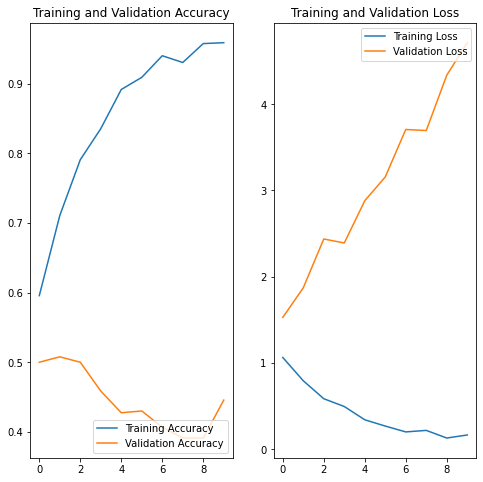

In [144]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Over time, the training set accuracy is increasing, while the validation set accuracty is decreasing. Suggests that the model is overfitting.

Let's improve the the fit by doing some data augmentation.

# Data Augmentation

In [22]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

2022-10-05 00:42:52.948045: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


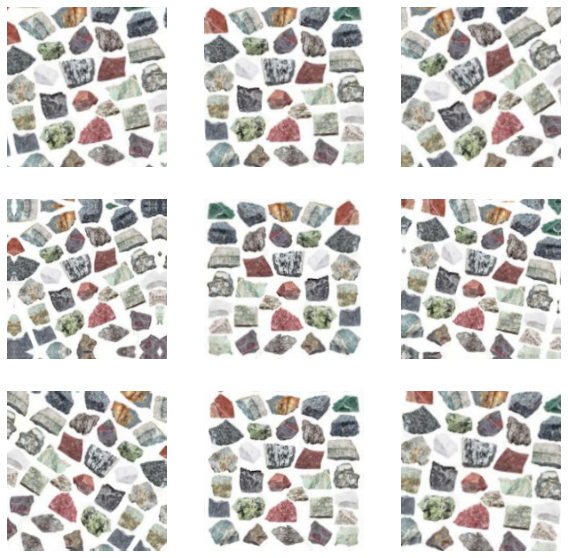

In [23]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

# Optimize Neural Network

Reduce overfitting by adding dropout layer

In [24]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

In [28]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
310/310 [==============================] - 30s 92ms/step - loss: 1.5577 - accuracy: 0.3979 - val_loss: 1.3967 - val_accuracy: 0.4793
Epoch 2/15
310/310 [==============================] - 24s 76ms/step - loss: 1.3601 - accuracy: 0.4851 - val_loss: 1.3385 - val_accuracy: 0.5000
Epoch 3/15
310/310 [==============================] - 24s 77ms/step - loss: 1.3129 - accuracy: 0.5013 - val_loss: 1.2799 - val_accuracy: 0.5337
Epoch 4/15
310/310 [==============================] - 23s 74ms/step - loss: 1.2682 - accuracy: 0.5329 - val_loss: 1.2502 - val_accuracy: 0.5544
Epoch 5/15
310/310 [==============================] - 24s 78ms/step - loss: 1.2394 - accuracy: 0.5407 - val_loss: 1.2820 - val_accuracy: 0.5363
Epoch 6/15
310/310 [==============================] - 24s 77ms/step - loss: 1.1984 - accuracy: 0.5640 - val_loss: 1.2753 - val_accuracy: 0.5337
Epoch 7/15
310/310 [==============================] - 23s 73ms/step - loss: 1.1712 - accuracy: 0.5704 - val_loss: 1.2624 - val_accuracy:

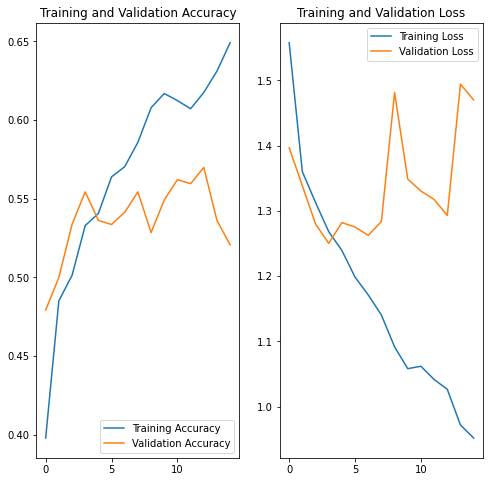

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()